# U.S. Commercial Aviation (2002 - 2017) Data Analysis

<img src="logo.jpg" width = "570">

## Loading the required libraries

In [56]:
library(ggplot2)
library(dplyr)
library(gridExtra)
library(RColorBrewer)
library(ggthemes)
library(ggrepel)
library(maps)
library(geosphere)
library(knitr)
library(fmsb)
library(date)
library(scales)

## Inserting the Airport Coordinates

"ggmap" does not work with Jupyter Notebook R kernels so I decided to impute the longitude and latitude values directly.

In [2]:
LONG<-c(-84.42770,-76.66839,-71.00956,-80.94731,-87.75219,-87.90732,-96.85121,-97.04034,-104.99025, -83.35538,-80.15060,
        -95.33678,-115.15374,-118.24368,-80.19179,-93.20100,-73.77814,-73.87397,-74.17446,-81.37924,-75.16522,-112.00779,
        -122.67648,-111.89105,-117.16108,-122.41942,-122.30882,-82.45718,  -77.04023,-77.45654)
LAT<-c(33.64073,39.17740,42.36561,35.21440,41.78678,41.97416,32.84810,32.89981,39.73924,42.21617,26.07423,29.99022,
       36.08400,34.05223,25.76168,44.93748,40.64131,40.77693,40.68953,28.53834, 39.95258,33.43727,45.52306,40.76078,
       32.71574,37.77493,47.45025,27.95058,38.85124,38.95312)

## Loading the Dataset

In [3]:
df = read.csv("airport_codes.csv", header=T)

df$long = LONG
df$lat = LAT
head(df,7)

Airport.Code,Airport.Name,long,lat
ATL,Hartsfield-Jackson Atlanta,-84.42770,33.64073
BWI,Baltimore-Washington,-76.66839,39.17740
BOS,Boston Logan,-71.00956,42.36561
CLT,Charlotte Douglas,-80.94731,35.21440
MDW,Chicago Midway,-87.75219,41.78678
ORD,Chicago O'Hare,-87.90732,41.97416
DAL,Dallas Love Field,-96.85121,32.84810


## Making Connections between Airports

The code below is :

- looping over airports
- retrieve the (longitude, latitude) as vector2.
- use gcIntermediate with a start_point, end_point (current loop iterator), n being the number of points in the line.
- save it as a dataframe (initially it is saved as a matrix) and append it to a list that holds the results.
- add start_airport, end_airport

In [4]:
allConnections_list<-list()

for(i in 1:nrow(df)){
  allConnections_df<-data.frame(lon=double(), lat=double(), start_airport=character(), end_airport = character())
  start<-c(df$long[i],df$lat[i])
  for(j in 1:nrow(df)){
    if(i!=j){
      end<-c(df$long[j],df$lat[j])
            inter <- data.frame(gcIntermediate(start,  end, n=100, addStartEnd=TRUE, breakAtDateLine=F))
            inter$start_airport <- rep(df$Airport.Code[i],nrow(inter))
            inter$end_airport <- rep(df$Airport.Code[j],nrow(inter))
            allConnections_df<-rbind(allConnections_df,inter)
    }
  }
  allConnections_list[[i]]<-allConnections_df
}

## Network Map

### Creating a US Map

In [5]:
states_map <-map_data("state")
USMAP <- ggplot() + 
  geom_map(data = states_map, 
           map = states_map,aes(x = long, y = lat, map_id = region, group = group),
           fill = "white", color = "black", size = 0.1)

Warning message:
"Ignoring unknown aesthetics: x, y"


In [6]:
#define customs color from rcolorbrewer, to be extended to n>10
mycols<-c("#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99", "#E31A1C", "#FDBF6F", "#FF7F00", 
          "#CAB2D6", "#6A3D9A", "#B15928")

### Creating a Network Map with Origin as Atlanta

Warning message:
"Use of `df$Airport.Name` is discouraged. Use `Airport.Name` instead."
Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


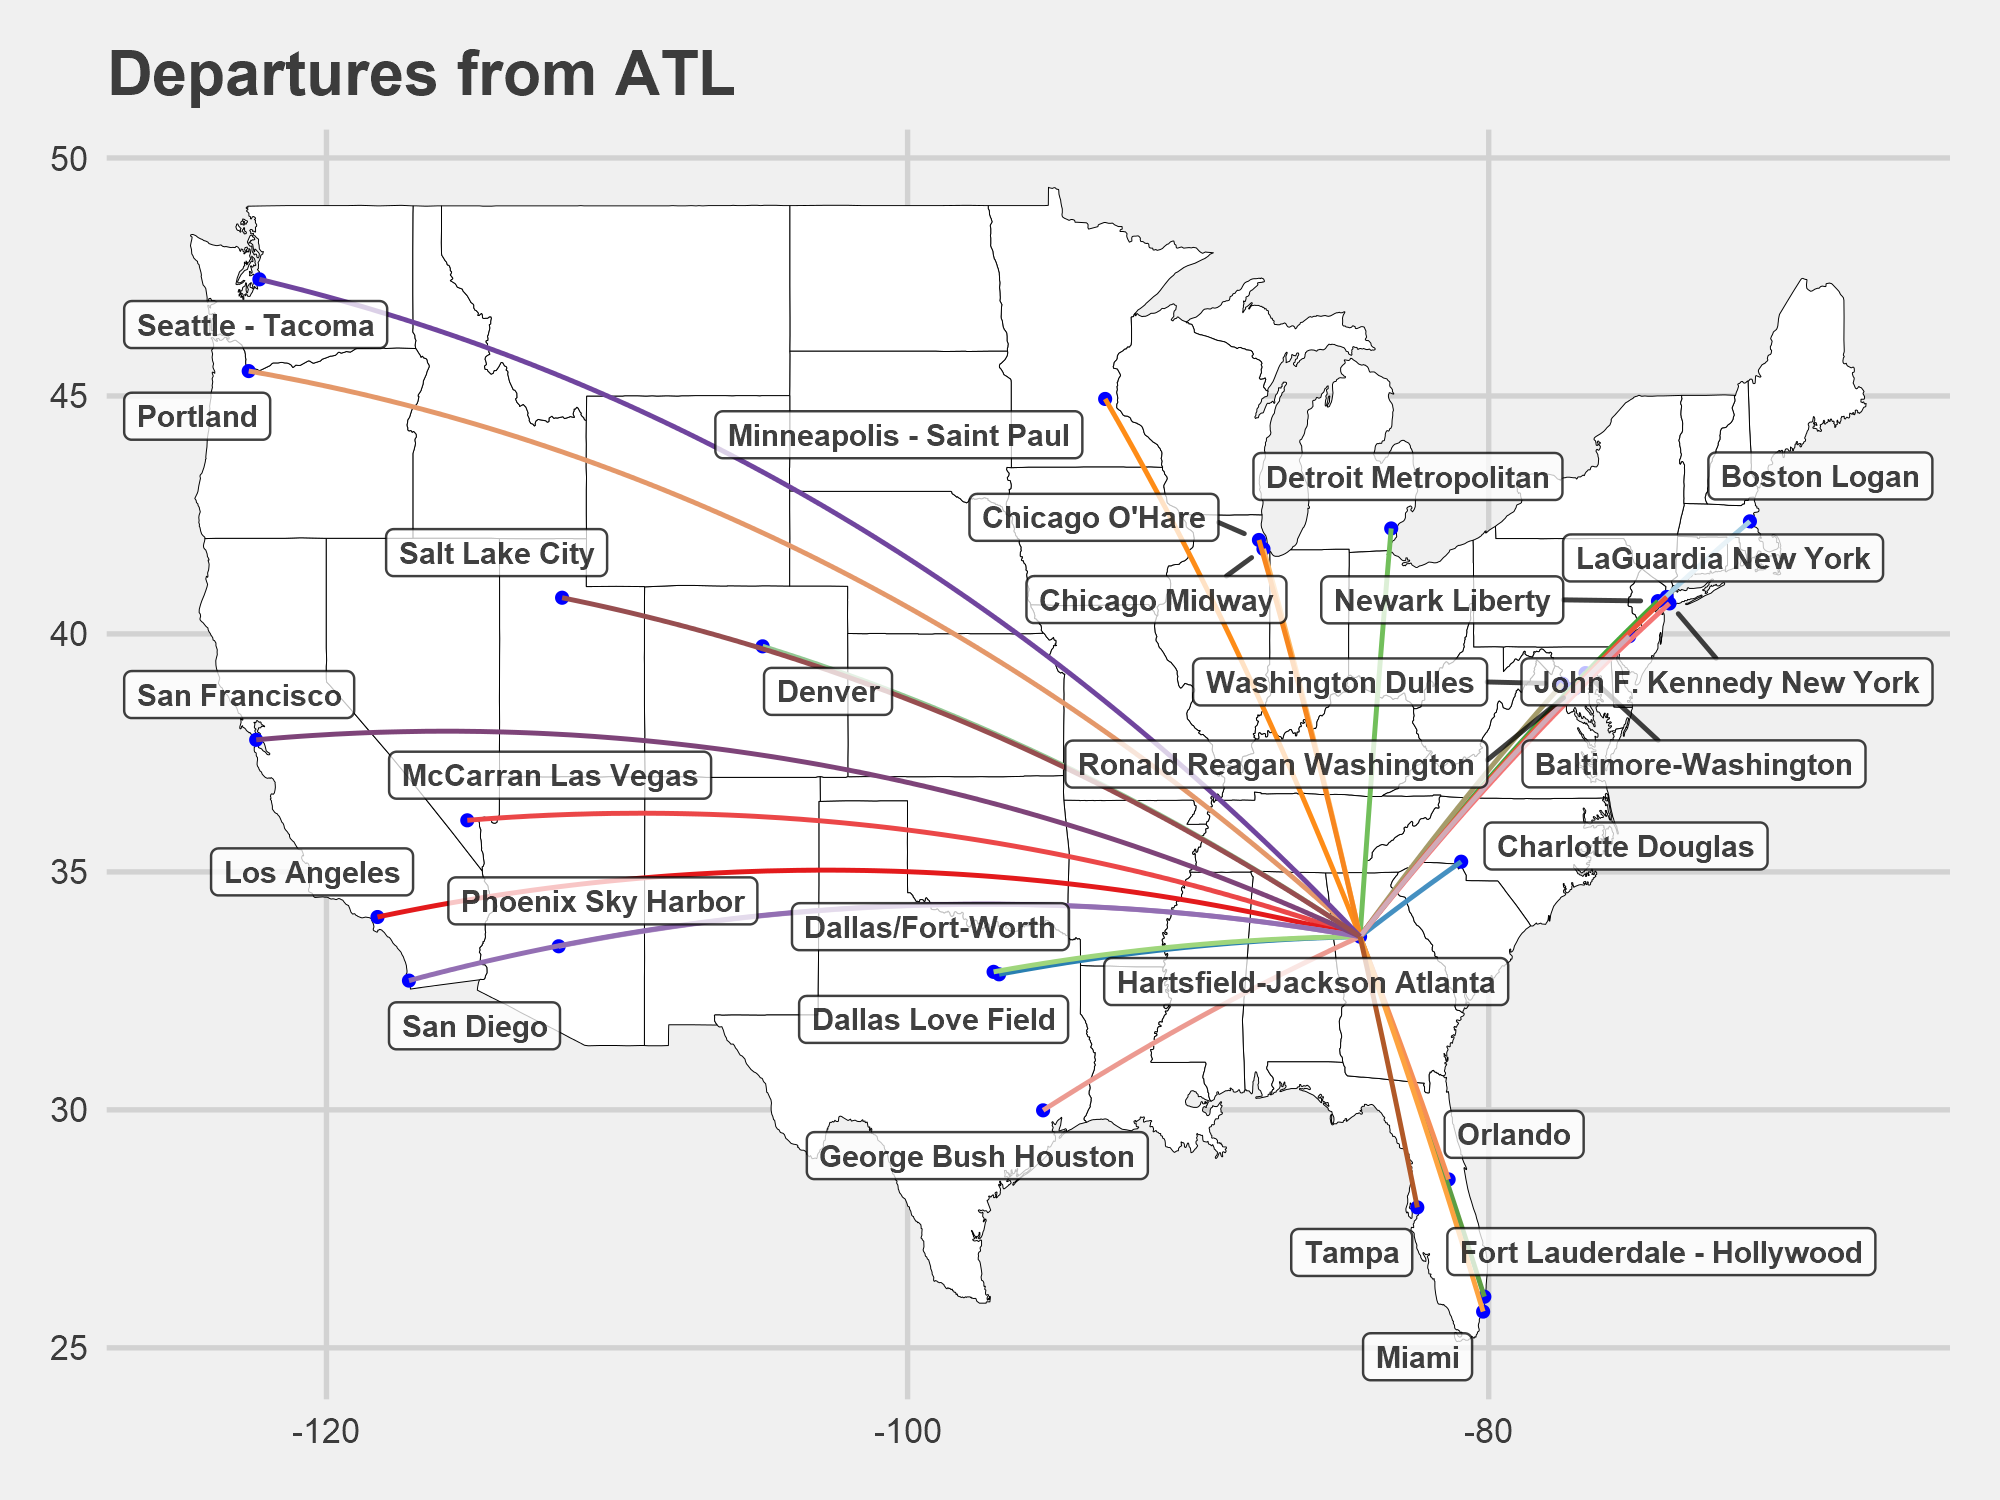

In [7]:
options(repr.plot.width=8, repr.plot.height=6,repr.plot.res = 250) #Defining the picture size and resolution
USMAP + 
  geom_point(data=df,aes(x=long,y=lat),size=1,color='blue',alpha=1.3) + 
  geom_line(data=allConnections_list[[1]],aes(x=lon,y=lat,color=end_airport)) +
  geom_label_repel(data=df,aes(x=long,y=lat,label=df$Airport.Name),
                   size=3,
                   fontface = 'bold', 
                   color = 'black',
                   box.padding = unit(0.35, "lines"),
                   point.padding = unit(0.5, "lines"),
                   segment.color = 'black',alpha=.75) + 
  theme_fivethirtyeight() + 
  theme(legend.position='none') + 
  scale_color_manual(values=colorRampPalette(mycols)(length(unique(allConnections_list[[1]]$end_airport)))) + 
  ggtitle(paste0('Departures from ',unique(allConnections_list[[1]]$start_airport)))

### Plotting flight routes from LA, Atlanta, and Chicago

Warning message:
"Use of `df$Airport.Name` is discouraged. Use `Airport.Name` instead."
Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


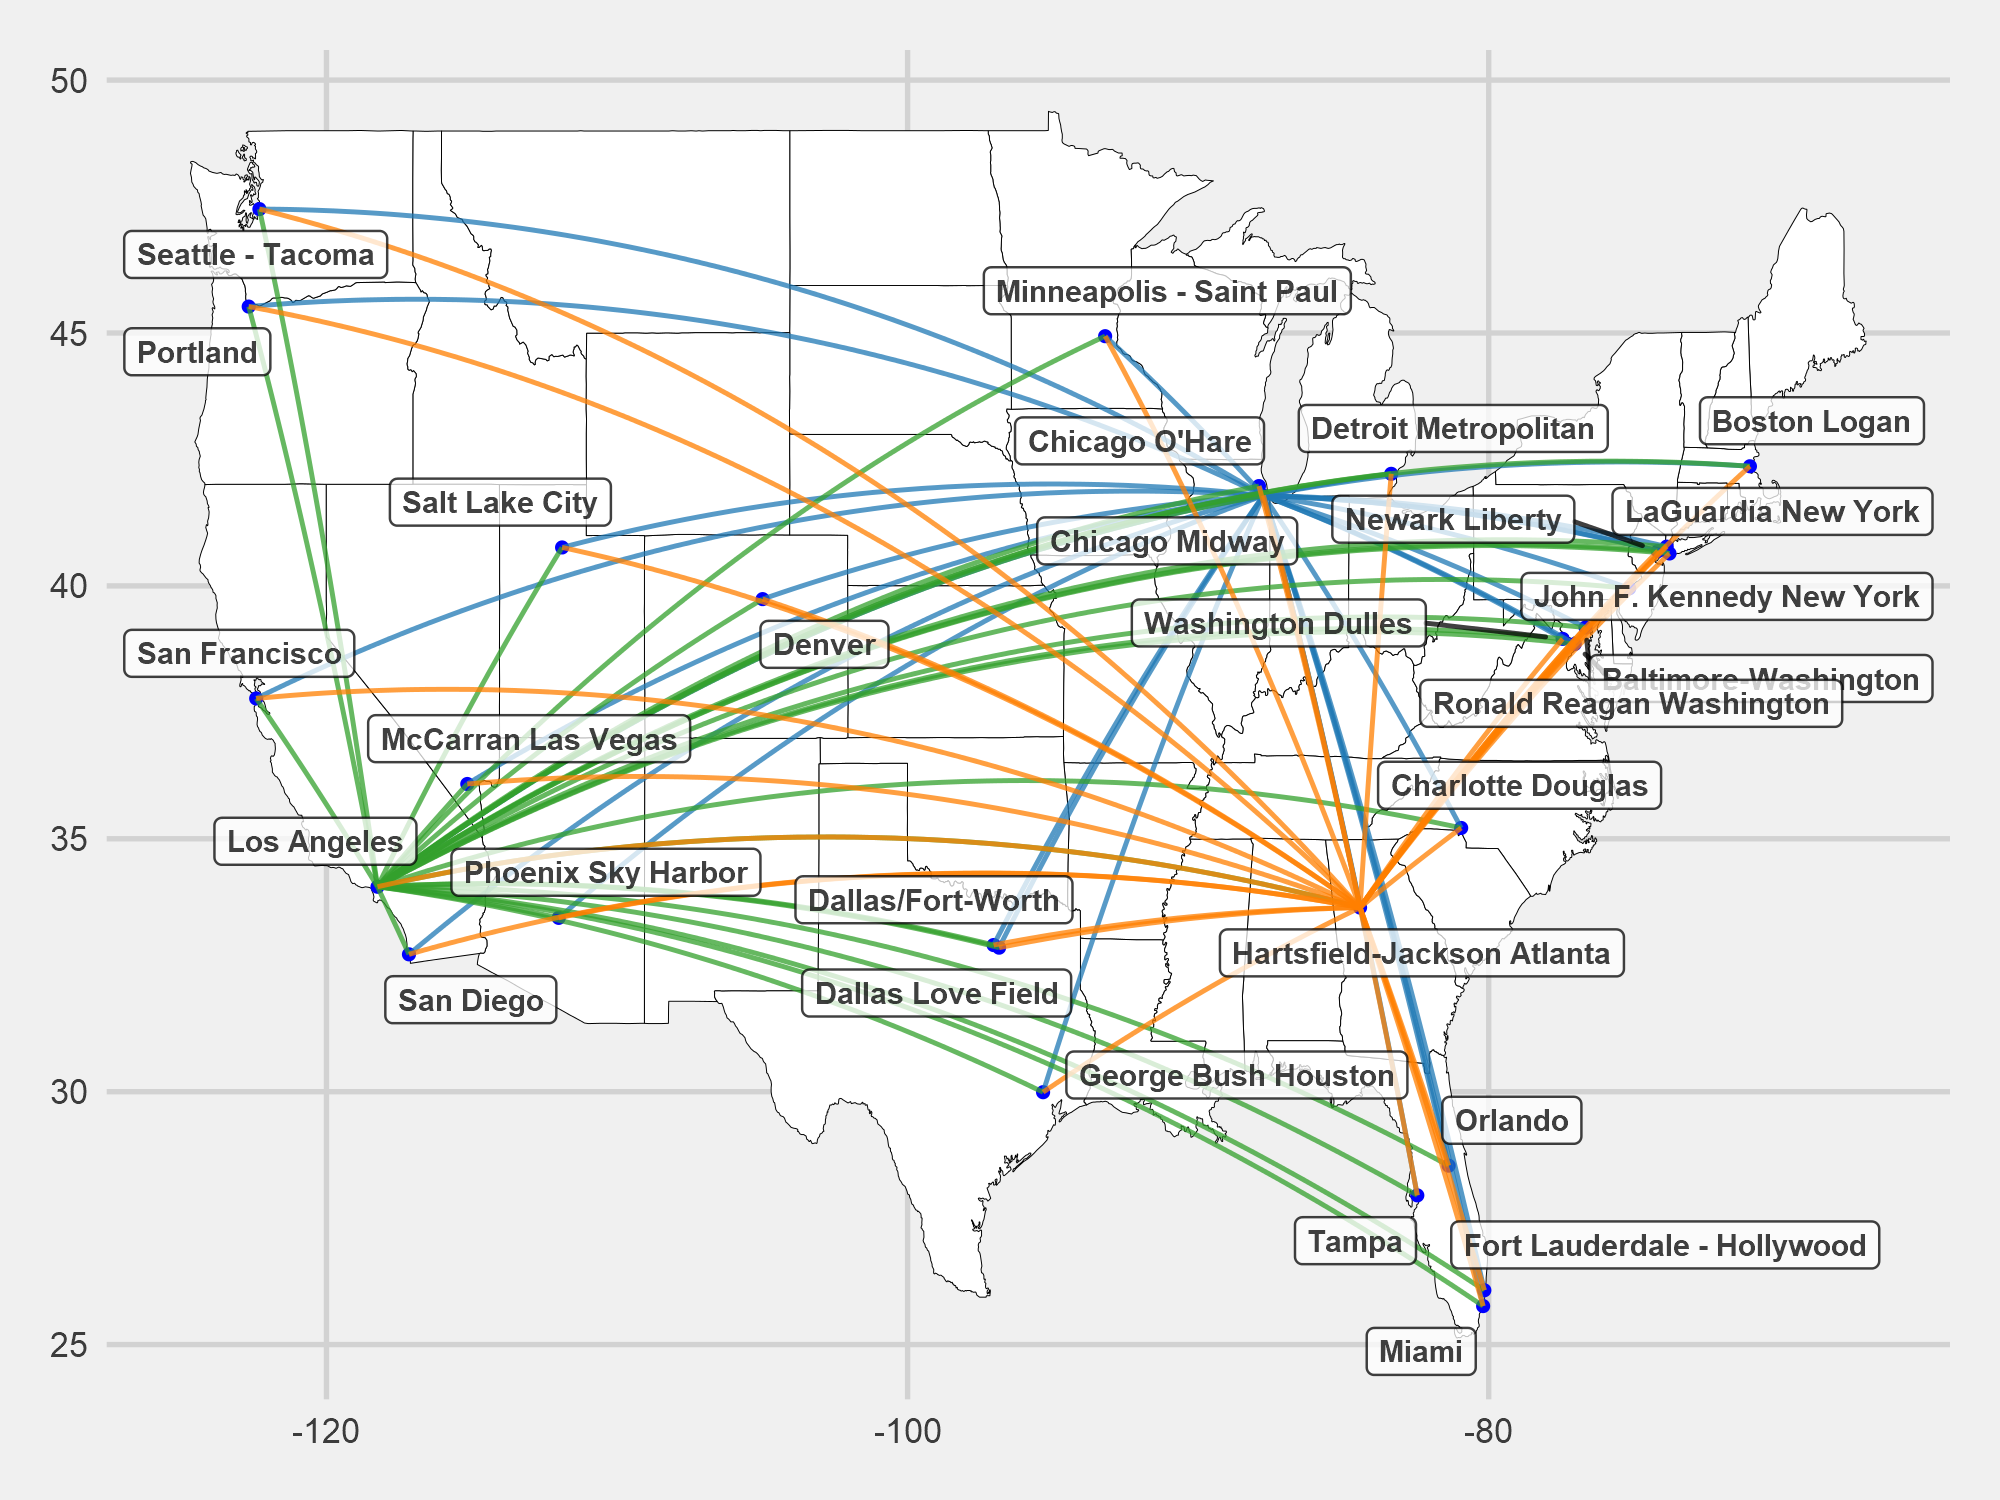

In [8]:
USMAP + 
  geom_point(data=df,aes(x=long,y=lat),size=1,color='blue',alpha=1) + 
  geom_line(data=allConnections_list[[5]],aes(x=lon,y=lat,group=end_airport),color='#1F78B4',alpha=.75) + 
  geom_line(data=allConnections_list[[14]],aes(x=lon,y=lat,group=end_airport),color='#33A02C',alpha=.75) + 
  geom_line(data=allConnections_list[[1]],aes(x=lon,y=lat,group=end_airport),color='#FF7F00',alpha=.75) + 
  geom_label_repel(data=df,aes(x=long,y=lat,label=df$Airport.Name),
                   size=3,
                   fontface = 'bold', 
                   color = 'black',
                   box.padding = unit(0.35, "lines"),
                   point.padding = unit(0.5, "lines"),
                   segment.color = 'black',alpha=.75) + 
  theme_fivethirtyeight() + theme(legend.position='none')

These connections are not real as I connected all the airports contained in the csv file.

## Percentage of flights per Airport and year

In [68]:
#Defining an empty list
AirlinesPerAirport = list()

#Reading the files
for(cnt in 1:length(df$Airport.Name)){
    AirlinesPerAirport[[cnt]]<-read.csv(paste0('data/all_airlines-',df$Airport.Code[cnt],'.csv'))
    AirlinesPerAirport[[cnt]]$Airport.Code<-rep(df$Airport.Code[cnt],nrow(AirlinesPerAirport[[cnt]]))
    AirlinesPerAirport[[cnt]]$Airport.Name<-rep(df$Airport.Name[cnt],nrow(AirlinesPerAirport[[cnt]]))
}
Airlines_df = do.call("rbind", AirlinesPerAirport)
Airlines_df$Date = as.Date(Airlines_df$Date, format = "%Y-%m-%d")
Airlines_df$Month = months(as.Date(Airlines_df$Date, format = "%Y-%m-%d"))
Airlines_df$Year =as.numeric(format(Airlines_df$Date, "%Y"))

### Heatmap

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



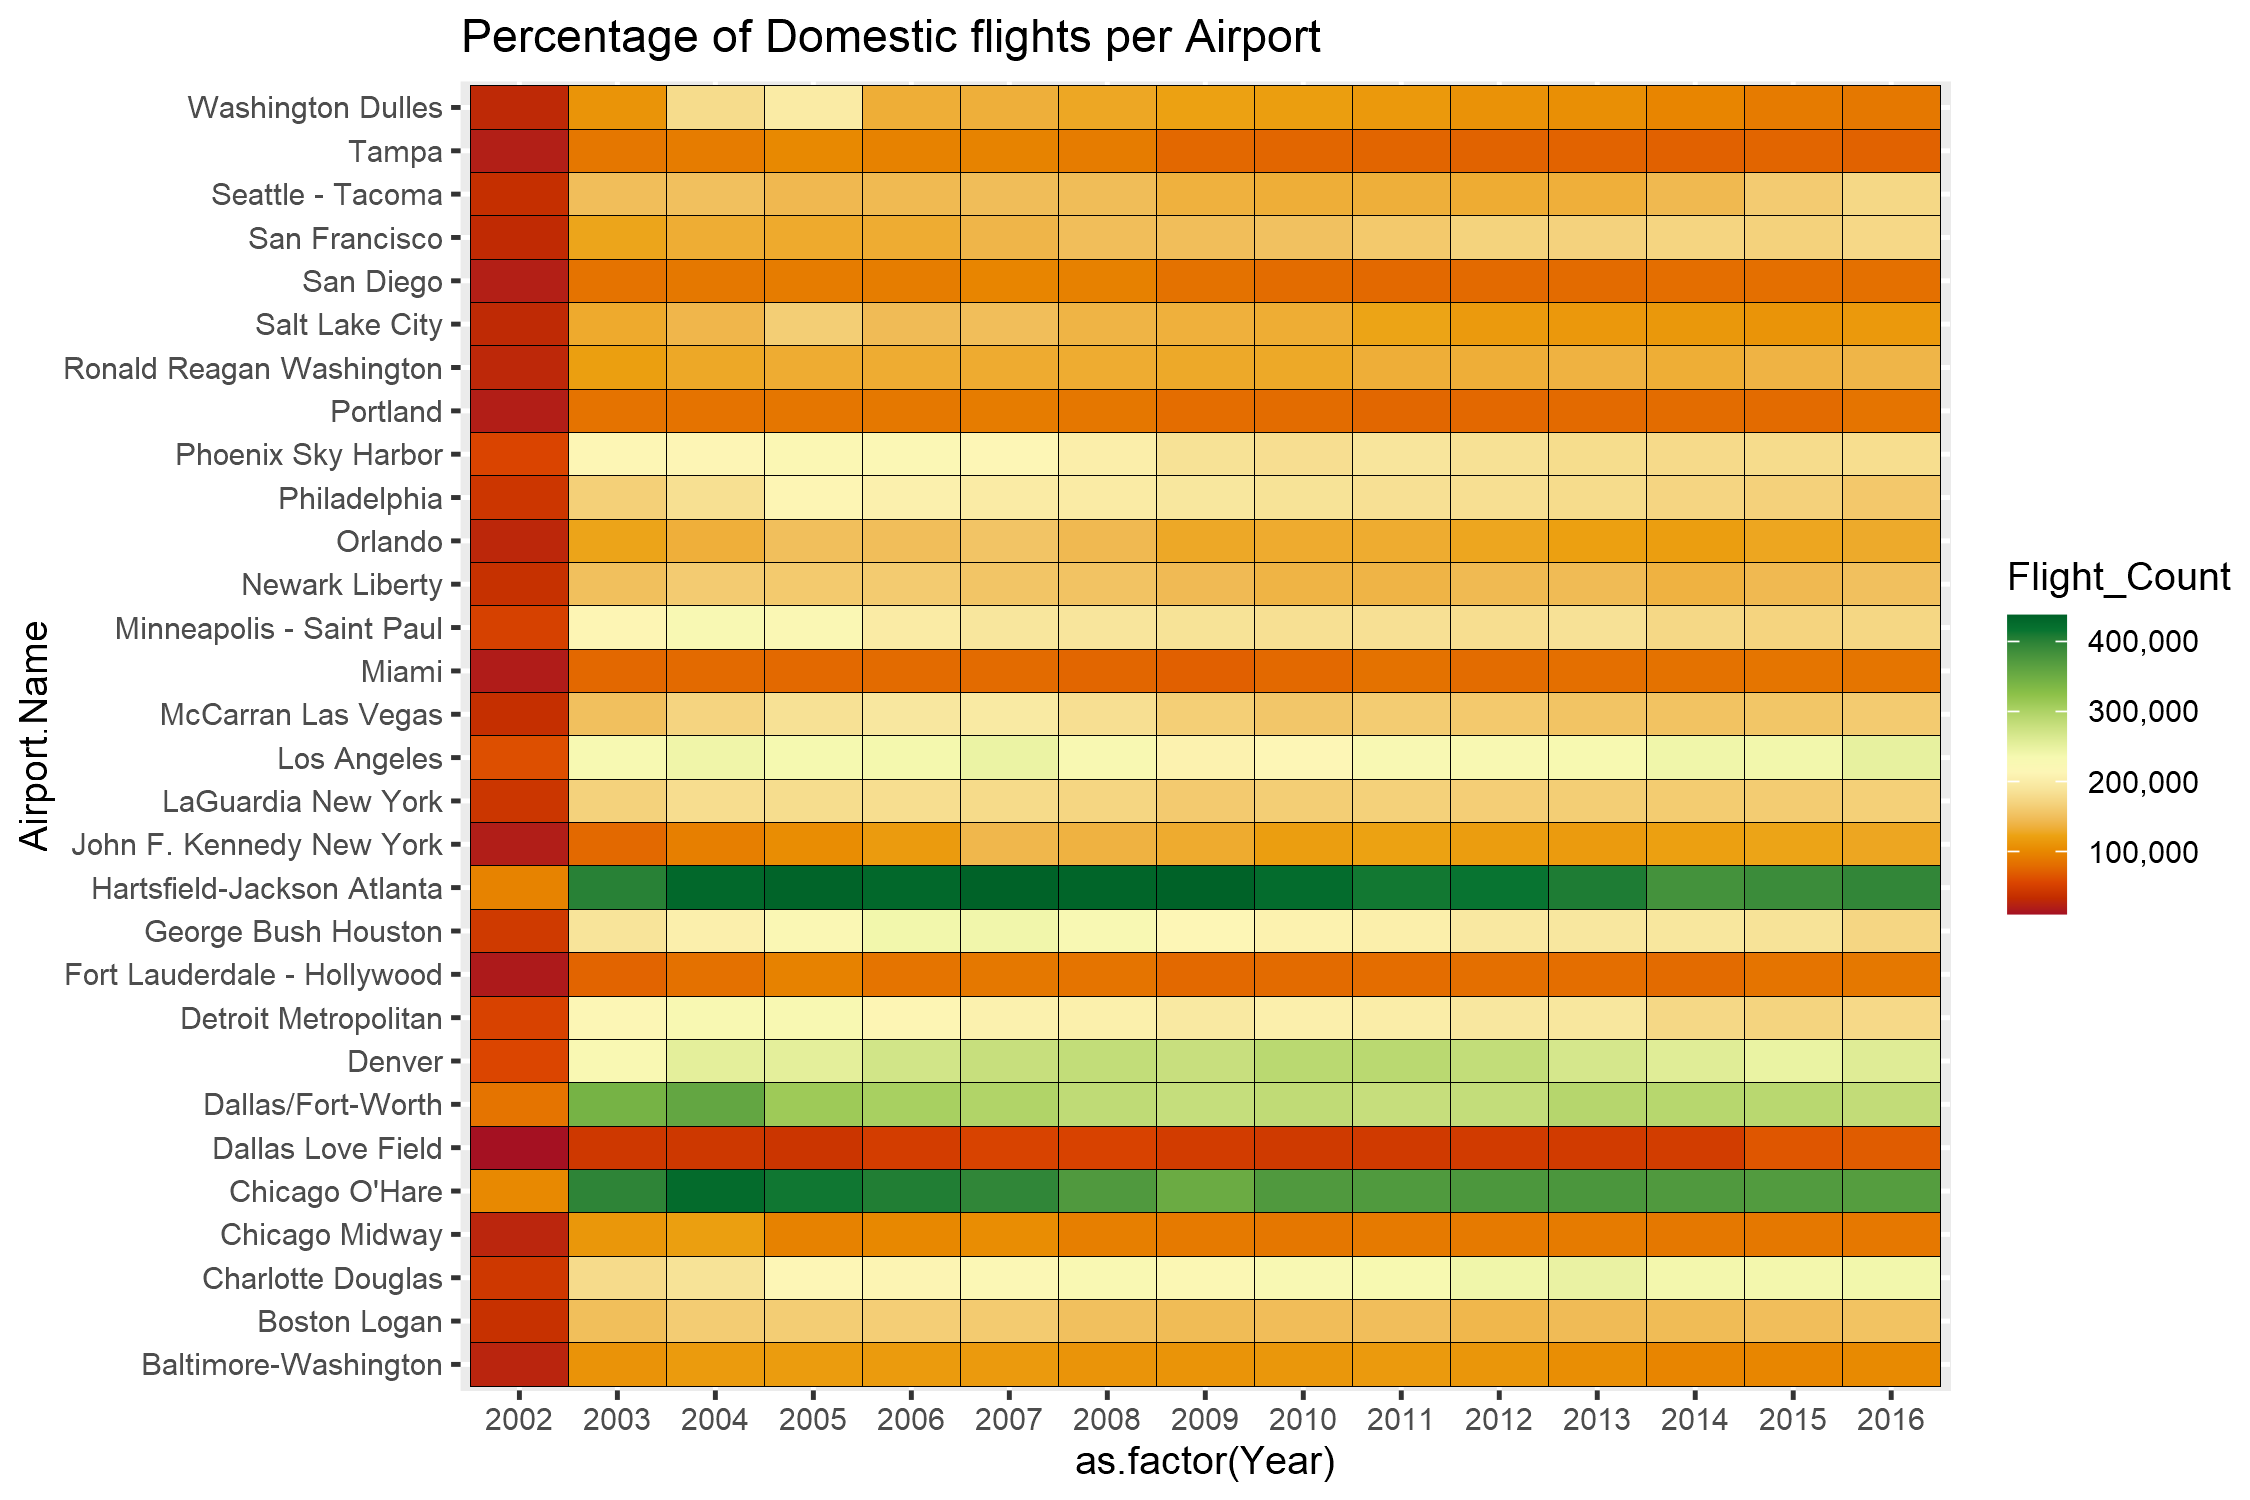

In [97]:
options(repr.plot.width=9, repr.plot.height=6,repr.plot.res = 250) #Defining the picture size and resolution
Airlines_df %>%
filter(Year<2017) %>%
group_by(Year, Airport.Name) %>%
summarise(Flight_Count = sum(Flights_Domestic)) %>%
ggplot(aes(x=as.factor(Year), y=Airport.Name, fill = Flight_Count))+geom_tile()+  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"), label = comma) +
ggtitle('Percentage of Domestic flights per Airport')

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



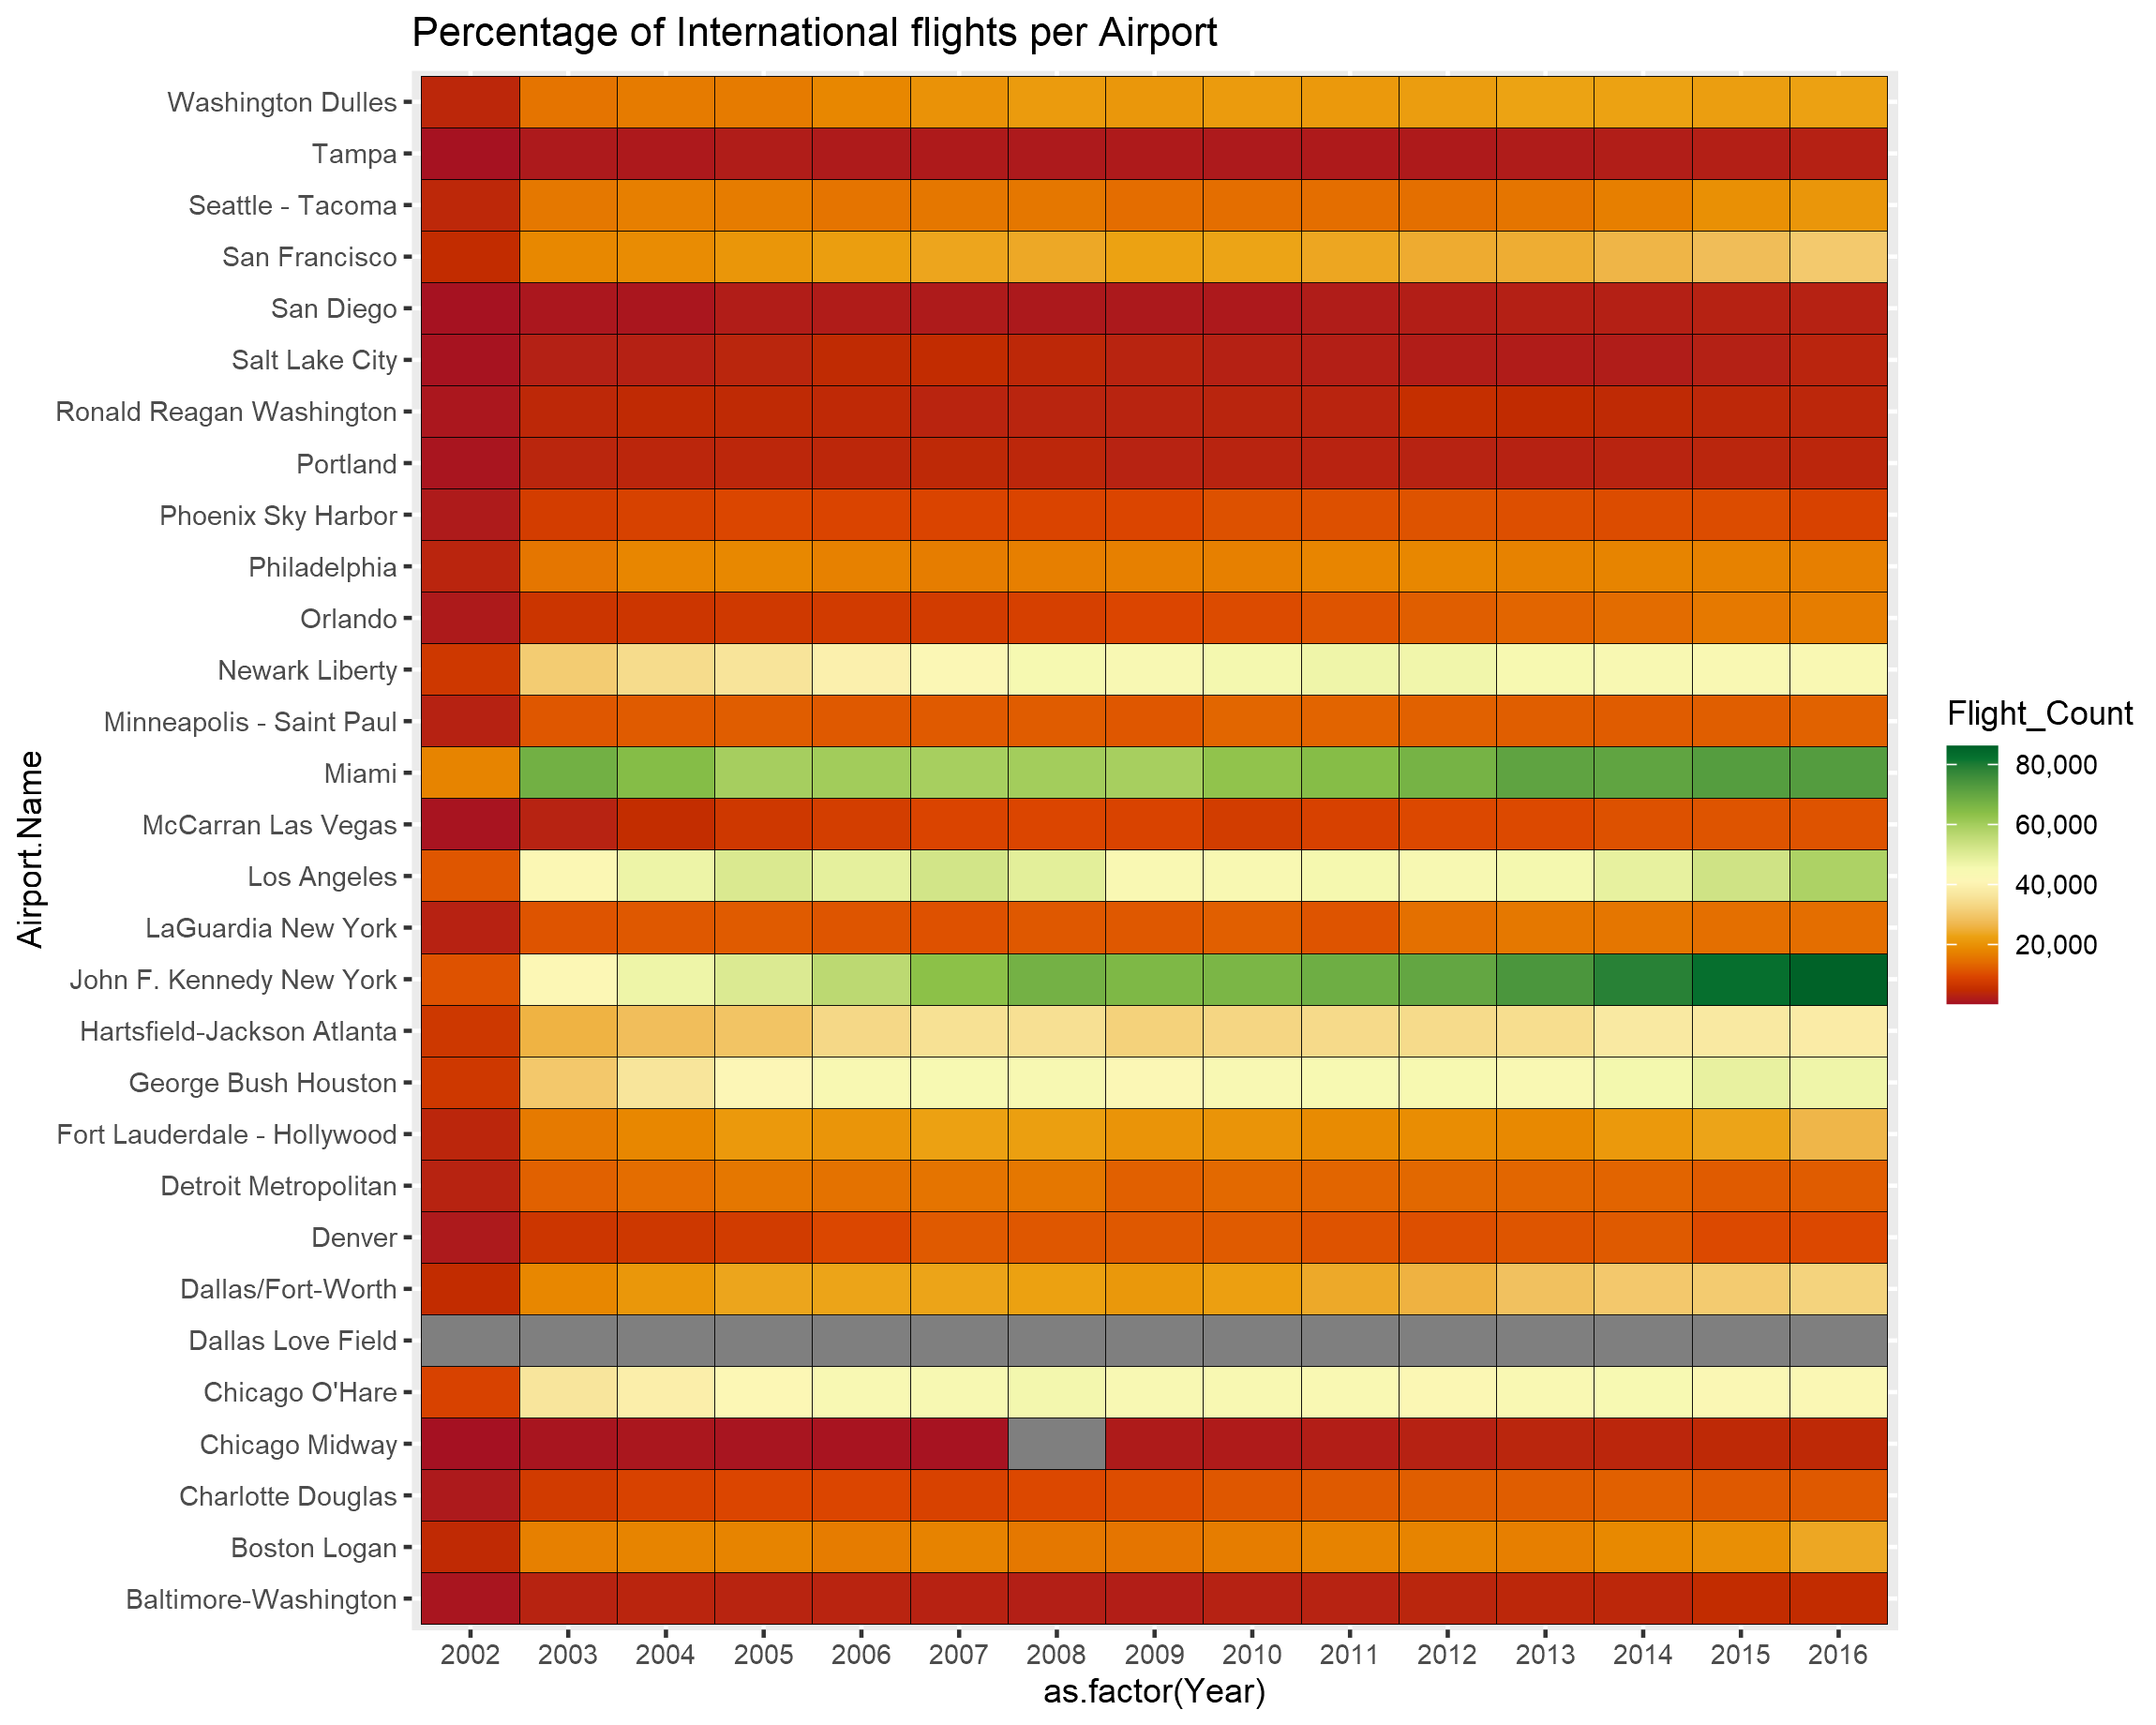

In [96]:
Airlines_df %>%
group_by(Year, Airport.Name) %>%
filter(Year<2017) %>%
summarise(Flight_Count = sum(Flights_International)) %>%
ggplot(aes(x=as.factor(Year), y=Airport.Name, fill = Flight_Count))+geom_tile()+  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn"), label = comma) +
ggtitle('Percentage of International flights per Airport')

## Percentage of domestic/international per Airport 

In [83]:
SummaryPercent = Airlines_df %>%
#Getting rid of year 2017 
filter(Year<2017) %>%
group_by(Year, Airport.Name) %>%
summarise(DomesticFlights = sum(Flights_Domestic),
          InternationalFlights = sum(Flights_International)) %>%
mutate(FlightSum = DomesticFlights+InternationalFlights,
      InternationalFlightsPerc = round(InternationalFlights/FlightSum,2)*100,
       DomesticFlightsPerc = 100-InternationalFlightsPerc)


`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



Warning message:
"Removed 16 rows containing missing values (geom_point)."
Warning message:
"Removed 16 rows containing missing values (geom_point)."


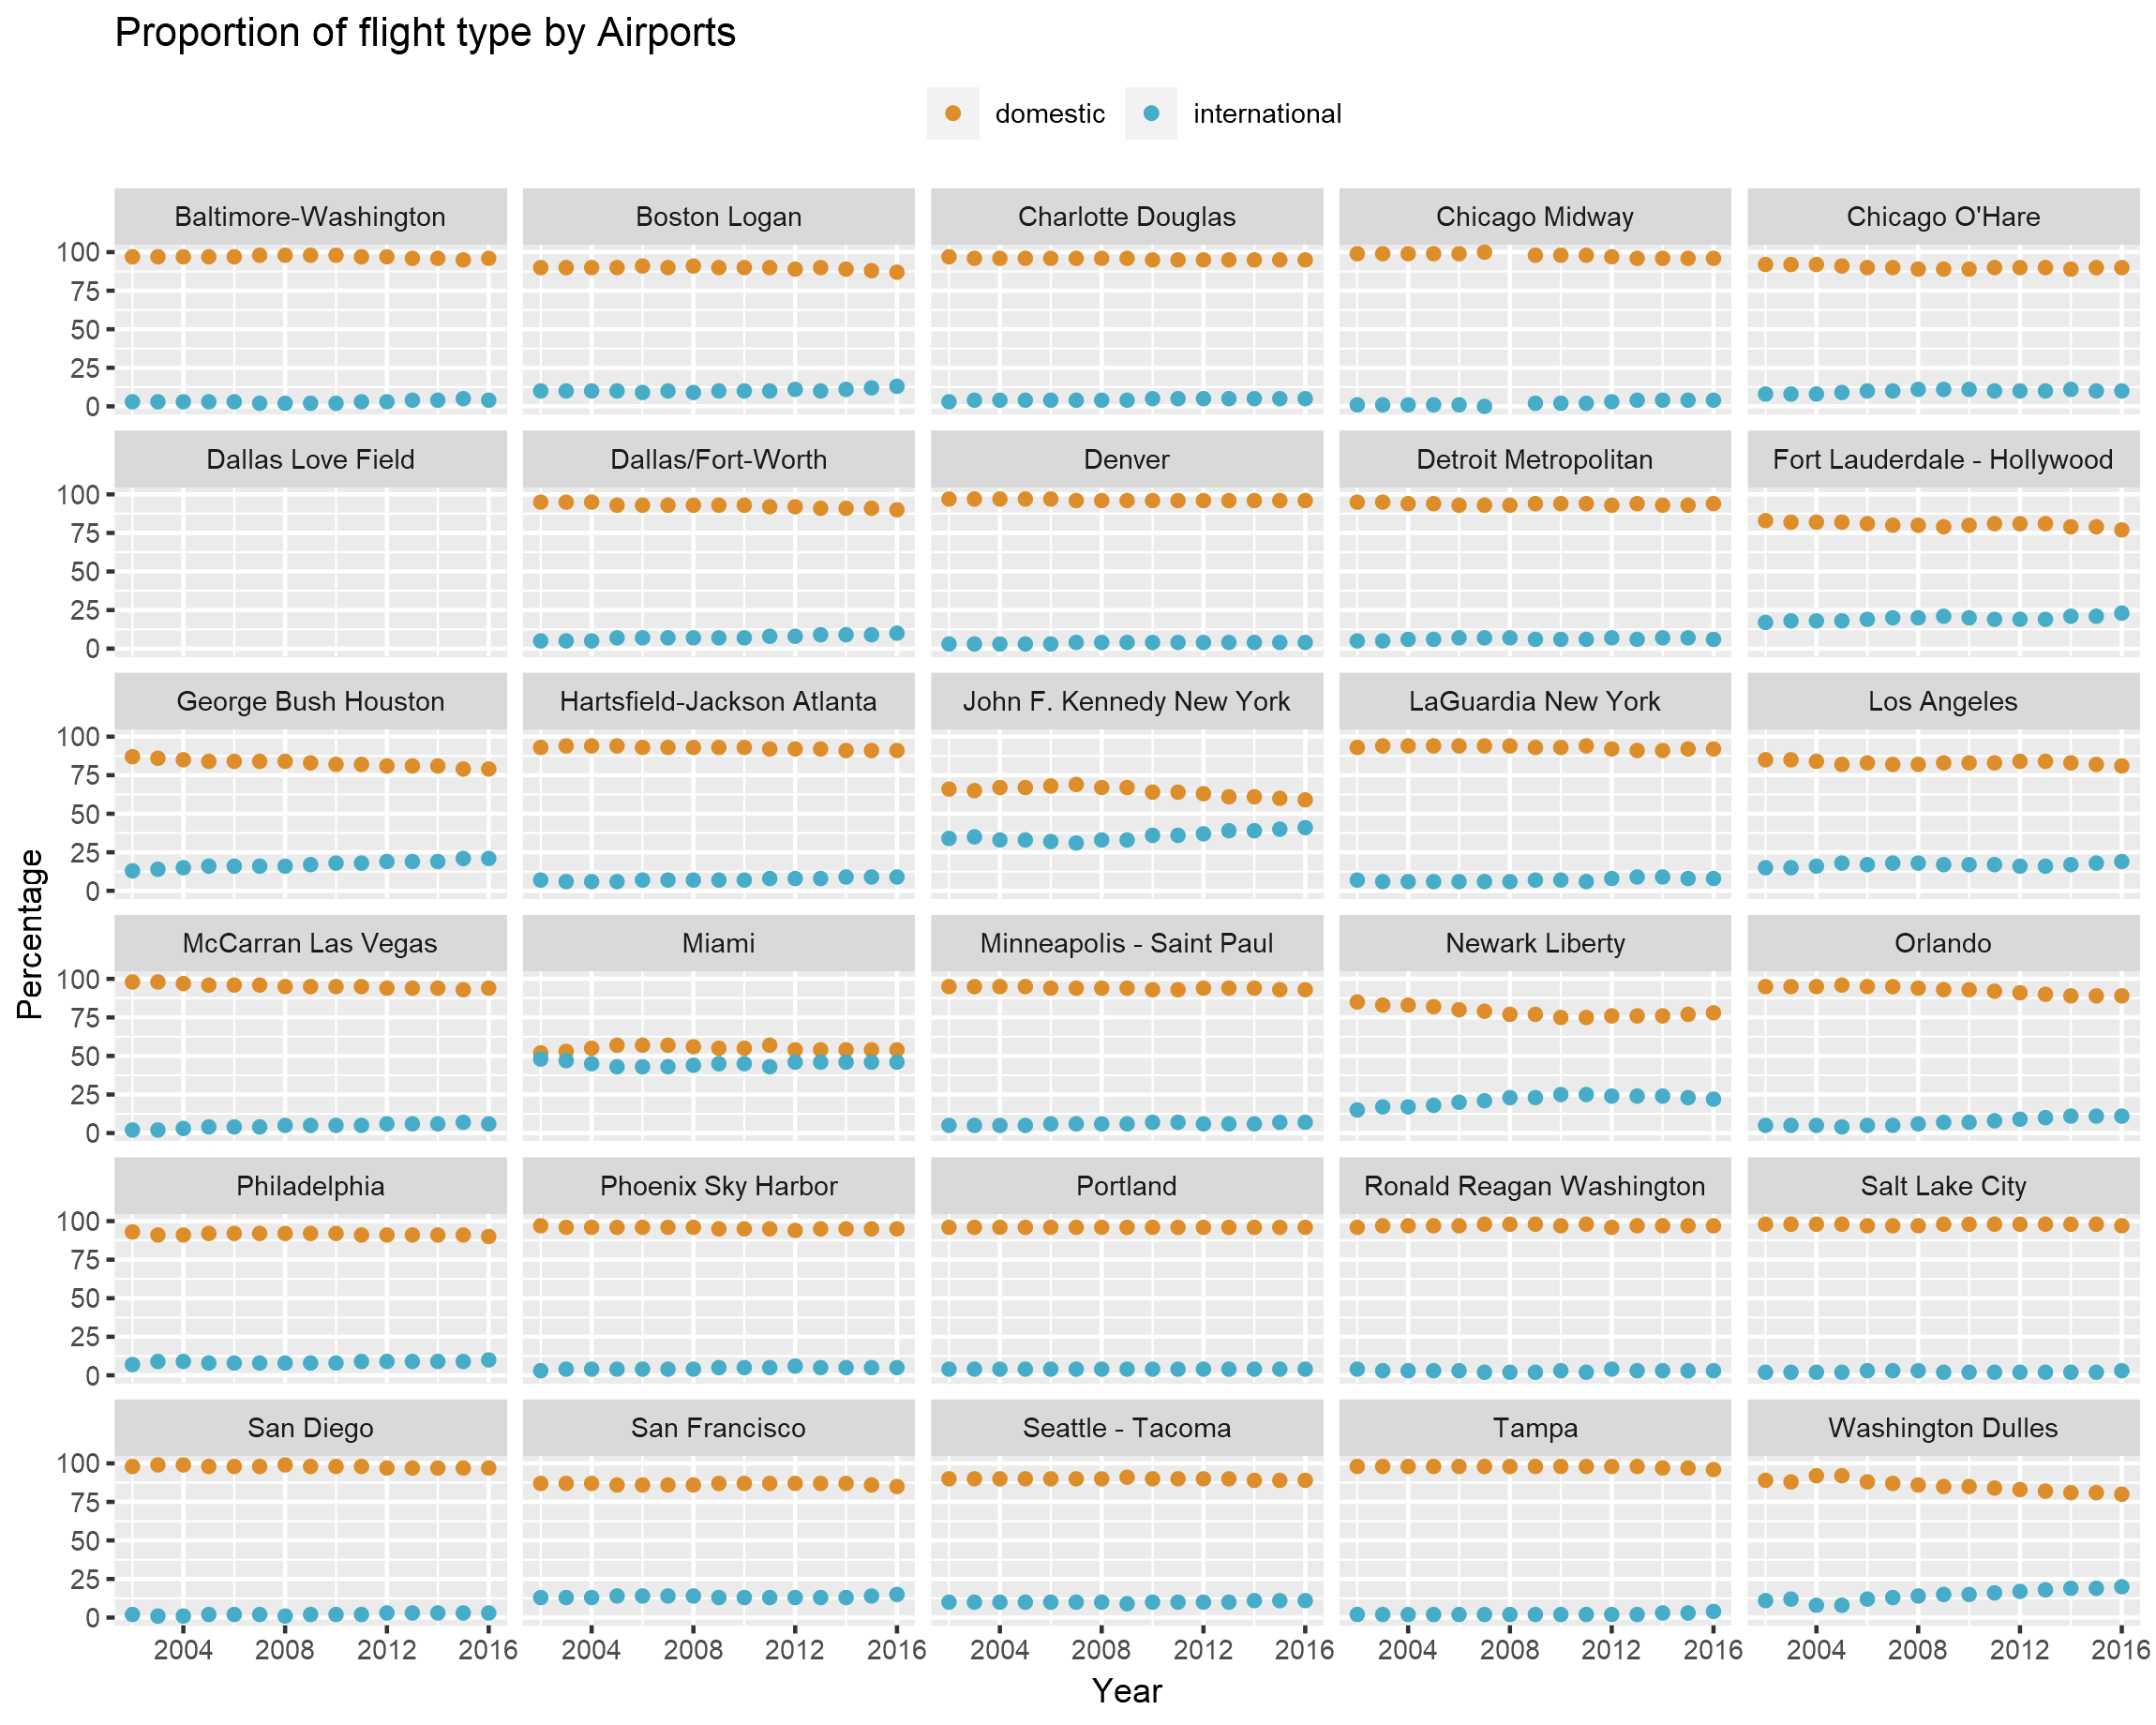

In [95]:
options(repr.plot.width=10, repr.plot.height=8,repr.plot.res = 230) #Defining the picture size and resolution
ggplot(data=SummaryPercent, aes(x=Year))+
geom_point(aes(y=DomesticFlightsPerc,color="domestic")) + 
geom_point(aes(y=InternationalFlightsPerc,color="international")) +
  scale_colour_manual(name="",values=c(domestic="#DD8D29",international="#46ACC8")) +
  facet_wrap(~Airport.Name,ncol=5) + 
  ggtitle('Proportion of flight type by Airports')+
  theme(legend.position='top') +
  ylab("Percentage")

## Exploring Year 2014

In [98]:
head(df)

Airport.Code,Airport.Name,long,lat
ATL,Hartsfield-Jackson Atlanta,-84.42770,33.64073
BWI,Baltimore-Washington,-76.66839,39.17740
BOS,Boston Logan,-71.00956,42.36561
CLT,Charlotte Douglas,-80.94731,35.21440
MDW,Chicago Midway,-87.75219,41.78678
ORD,Chicago O'Hare,-87.90732,41.97416


In [112]:
head(SummaryPercent)

Year,Airport.Name,DomesticFlights,InternationalFlights,FlightSum,InternationalFlightsPerc,DomesticFlightsPerc
2002,Baltimore-Washington,27212,792,28004,3,97
2002,Boston Logan,37913,4353,42266,10,90
2002,Charlotte Douglas,44126,1449,45575,3,97
2002,Chicago Midway,27953,215,28168,1,99
2002,Chicago O'Hare,101585,8688,110273,8,92
2002,Dallas Love Field,11242,NA,NA,NA,NA


### Merging the above two dataframes by Airport.Name

In [184]:
Yr2012 = na.omit(merge(df,SummaryPercent %>% filter(Year==2014),by='Airport.Name'))

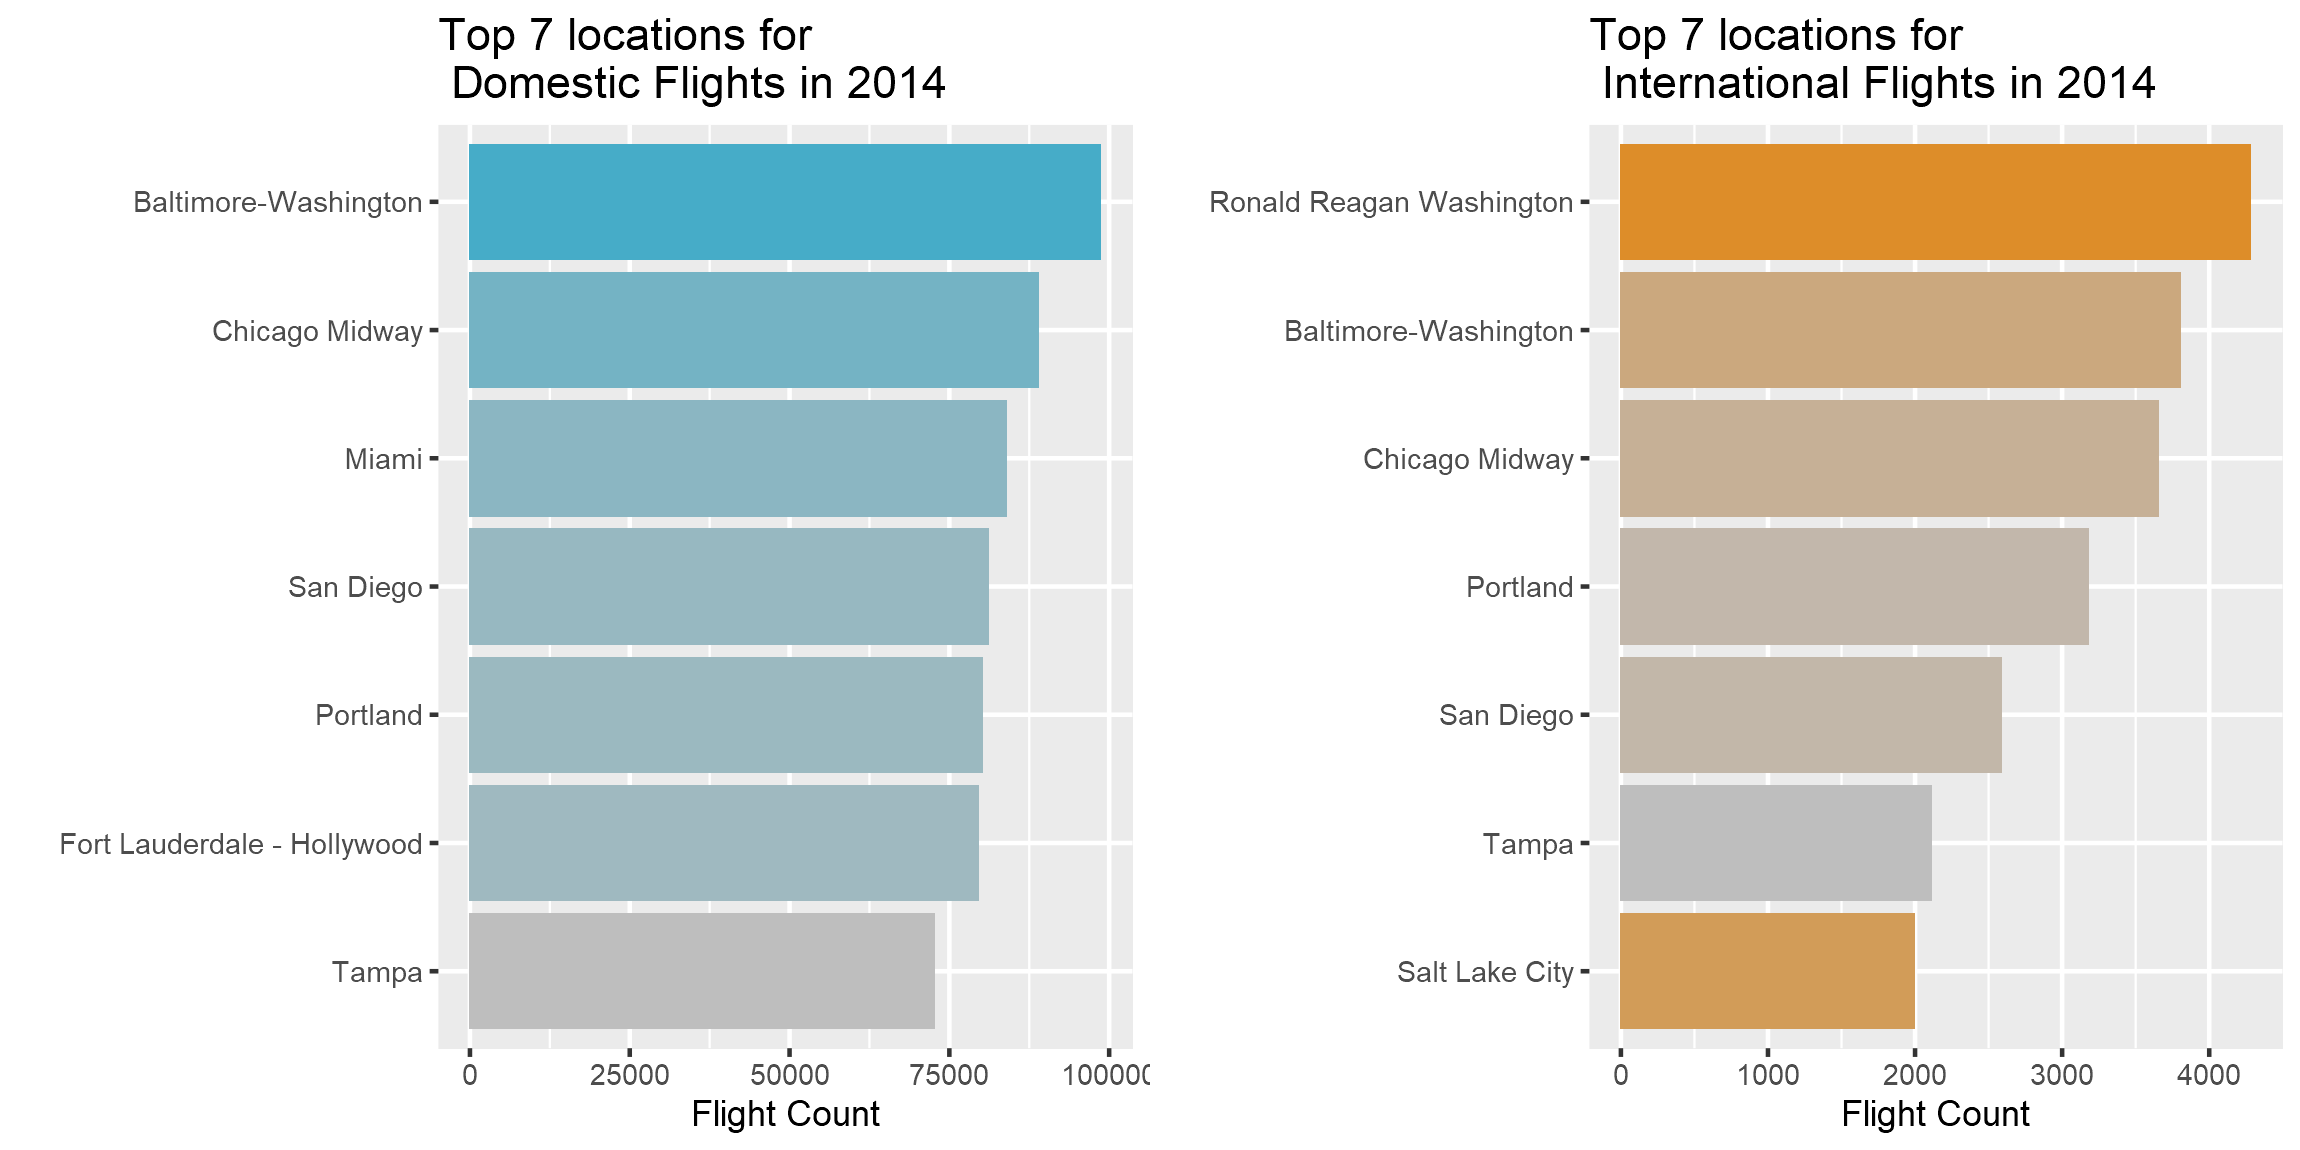

In [185]:
options(repr.plot.width=10, repr.plot.height=5,repr.plot.res = 230) #Defining the picture size and resolution
yr2k12Plot_domestic = Yr2012 %>% arrange(DomesticFlights) %>% head(7) %>% ggplot(aes(x=reorder(Airport.Name,DomesticFlights),y=DomesticFlights)) + 
  geom_bar(aes(fill=DomesticFlights),stat='identity')+ 
coord_flip()+scale_fill_gradientn(name='',colors=colorRampPalette(c("gray","#46ACC8"))(7)) + 
  theme(legend.position='none',plot.title = element_text(size =14)) +
  ggtitle('Top 7 locations for\n Domestic Flights in 2014')+ylab("Flight Count")+xlab("")

yr2k12Plot_int = Yr2012 %>% arrange(InternationalFlights) %>% head(7) %>% 
ggplot(aes(x=reorder(Airport.Name,InternationalFlights),y=InternationalFlights))+ylab("Flight Count")+
  geom_bar(aes(fill=DomesticFlights),stat='identity')+
coord_flip()+scale_fill_gradientn(name='',colors=colorRampPalette(c("gray","#DD8D29"))(7)) + xlab("") +
  theme(legend.position='none',plot.title = element_text(size =14)) +
  ggtitle('Top 7 locations for\n International Flights in 2014')

grid.arrange(yr2k12Plot_domestic,yr2k12Plot_int,nrow=1)

Warning message:
"Use of `df$Airport.Name` is discouraged. Use `Airport.Name` instead."
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


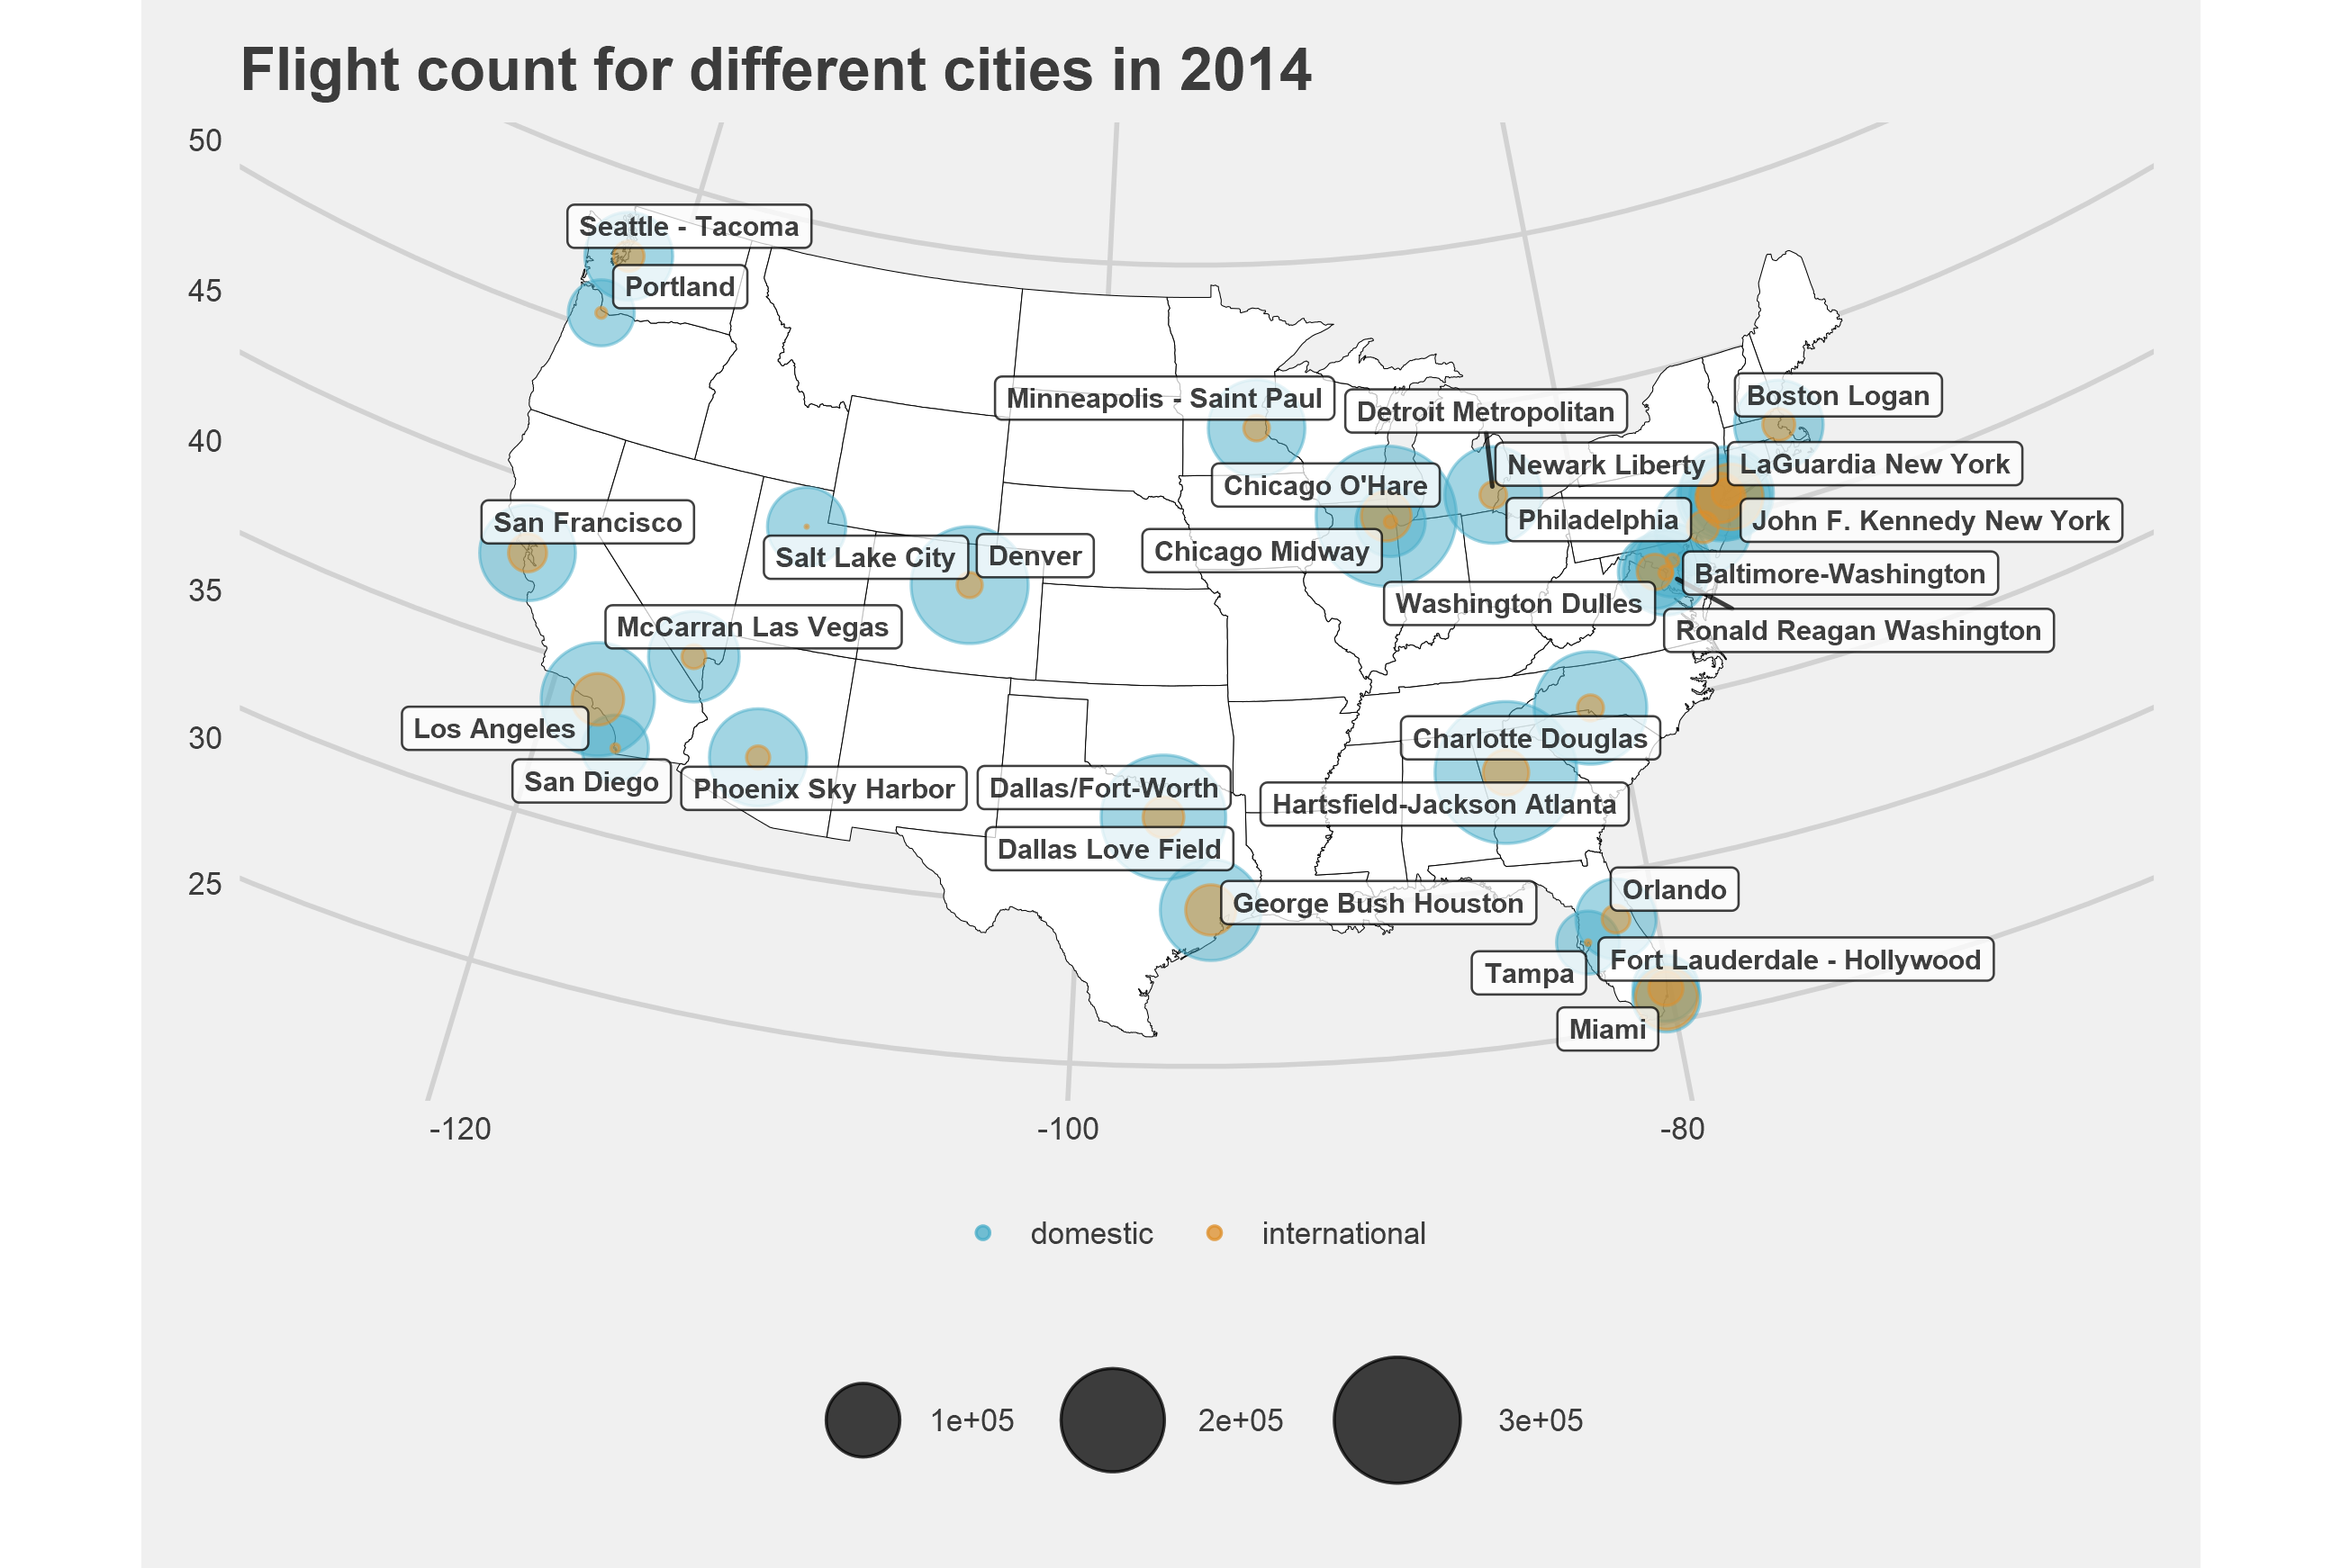

In [186]:
options(repr.plot.height=6.7,repr.plot.res = 260) #Defining the picture size and resolution
USMAP+
geom_point(data=Yr2012,aes(x=long,y=lat,size=DomesticFlights,color="domestic"),alpha=.5) + 
  geom_point(data=Yr2012,aes(x=long,y=lat,size=InternationalFlights,color="international"),alpha=.5) + 
  geom_label_repel(data=df,aes(x=long,y=lat,label=df$Airport.Name),
                   size=3,
                   fontface = 'bold', 
                   color = 'black',
                   box.padding = unit(0.1, "lines"),
                   point.padding = unit(0.5, "lines"),
                   segment.color = 'black',alpha=.75,force=10) + 
  scale_colour_manual(name="",values=c(domestic="#46ACC8",international="#DD8D29")) + 
  theme_fivethirtyeight() + 
  scale_size(range = c(0, 20)) + 
  theme(legend.title=element_blank()) + 
  coord_map("albers", lat0=39, lat1=49) + 
  ggtitle('Flight count for different cities in 2014')

In [191]:
AllAirlines<-read.csv('airline_codes.csv')
#airline_acro<-all_airlines$Airline.Code
#airline_name<-all_airlines$Airline.Name
allAirlines<-list()
cnt<-1
for(i in 1:length(AllAirlines$Airline.Code)){
    if(AllAirlines$Airline.Code[i]!='5Y'){
        allAirlines[[cnt]]<-read.csv(paste0('data/',AllAirlines$Airline.Code[i],'-all_airports.csv'))
        allAirlines[[cnt]]$Airline.Code<-rep(AllAirlines$Airline.Code[i],nrow(allAirlines[[cnt]]))
        allAirlines[[cnt]]$Airline.Name<-rep(AllAirlines$Airline.Name[i],nrow(allAirlines[[cnt]]))
        cnt=cnt+1
        }
}

Airlines_dff <- do.call("rbind", allAirlines)

Airlines_dff$Date = as.Date(Airlines_dff$Date, format = "%Y-%m-%d")
Airlines_dff$Month = months(as.Date(Airlines_dff$Date, format = "%Y-%m-%d"))
Airlines_dff$Year =as.numeric(format(Airlines_dff$Date, "%Y"))

In [194]:
t <- Airlines_dff %>% 
  group_by(Year, Airline.Name) %>% 
  select(-Date,-Airline.Code,-Airline.Name,-Year,-Month) %>% 
  summarise_all(funs(sum))

dd<-data.frame(t %>% group_by(Year, Airline.Name) %>% summarise_all(funs(sum)))

Adding missing grouping variables: `Year`, `Airline.Name`

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


In [195]:
dd

Year,Airline.Name,ASM_Domestic,ASM_International,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International,RPM_Domestic,RPM_International
2002,Alaska Airlines,3934978,823959,37562,5142,2913737,452560,2636424,527682
2002,Allegient Air,27550,NA,467,NA,30606,NA,13170,NA
2002,American Airlines,29754707,12395613,205047,35962,18793013,3945328,20694131,8741193
2002,Delta Airlines,24378688,7677904,176241,11770,20913039,1604401,17542384,5386352
2002,Envoy Air,1237951,102928,69240,2556,2239492,74026,855985,63105
2002,ExpressJet Airlines,1526776,NA,13511,NA,994023,NA,889572,NA
2002,Frontier Airlines,1442330,51460,107132,2583,2764948,58857,909549,29014
2002,Hawaiian Airlines,1672345,22069,12816,26,1341011,5317,1229935,14515
2002,JetBlue Airways,2457634,NA,13339,NA,1726645,NA,2006296,NA
2002,SkyWest Airlines,1130827,43985,86796,1615,2213389,37776,799857,22923


In [200]:
#define the max values for each (year,features) among all companies
maxVal<-data.frame(dd %>% select(-Airline.Name) %>% group_by(Year) %>% na.omit() %>% summarise_all(funs(max)))
#define color palette per companies (same as histograms)
col_airlines<-colorRampPalette(mycols)(length(unique(Airlines_dff$Airline.Name)))

data2014<- as.data.frame(t %>% filter(Year==2014))
min<-rep.int(0,8)
max_2014 <- 1.01*(maxVal[15,2:9] %>% sapply(as.integer) %>% as.vector)

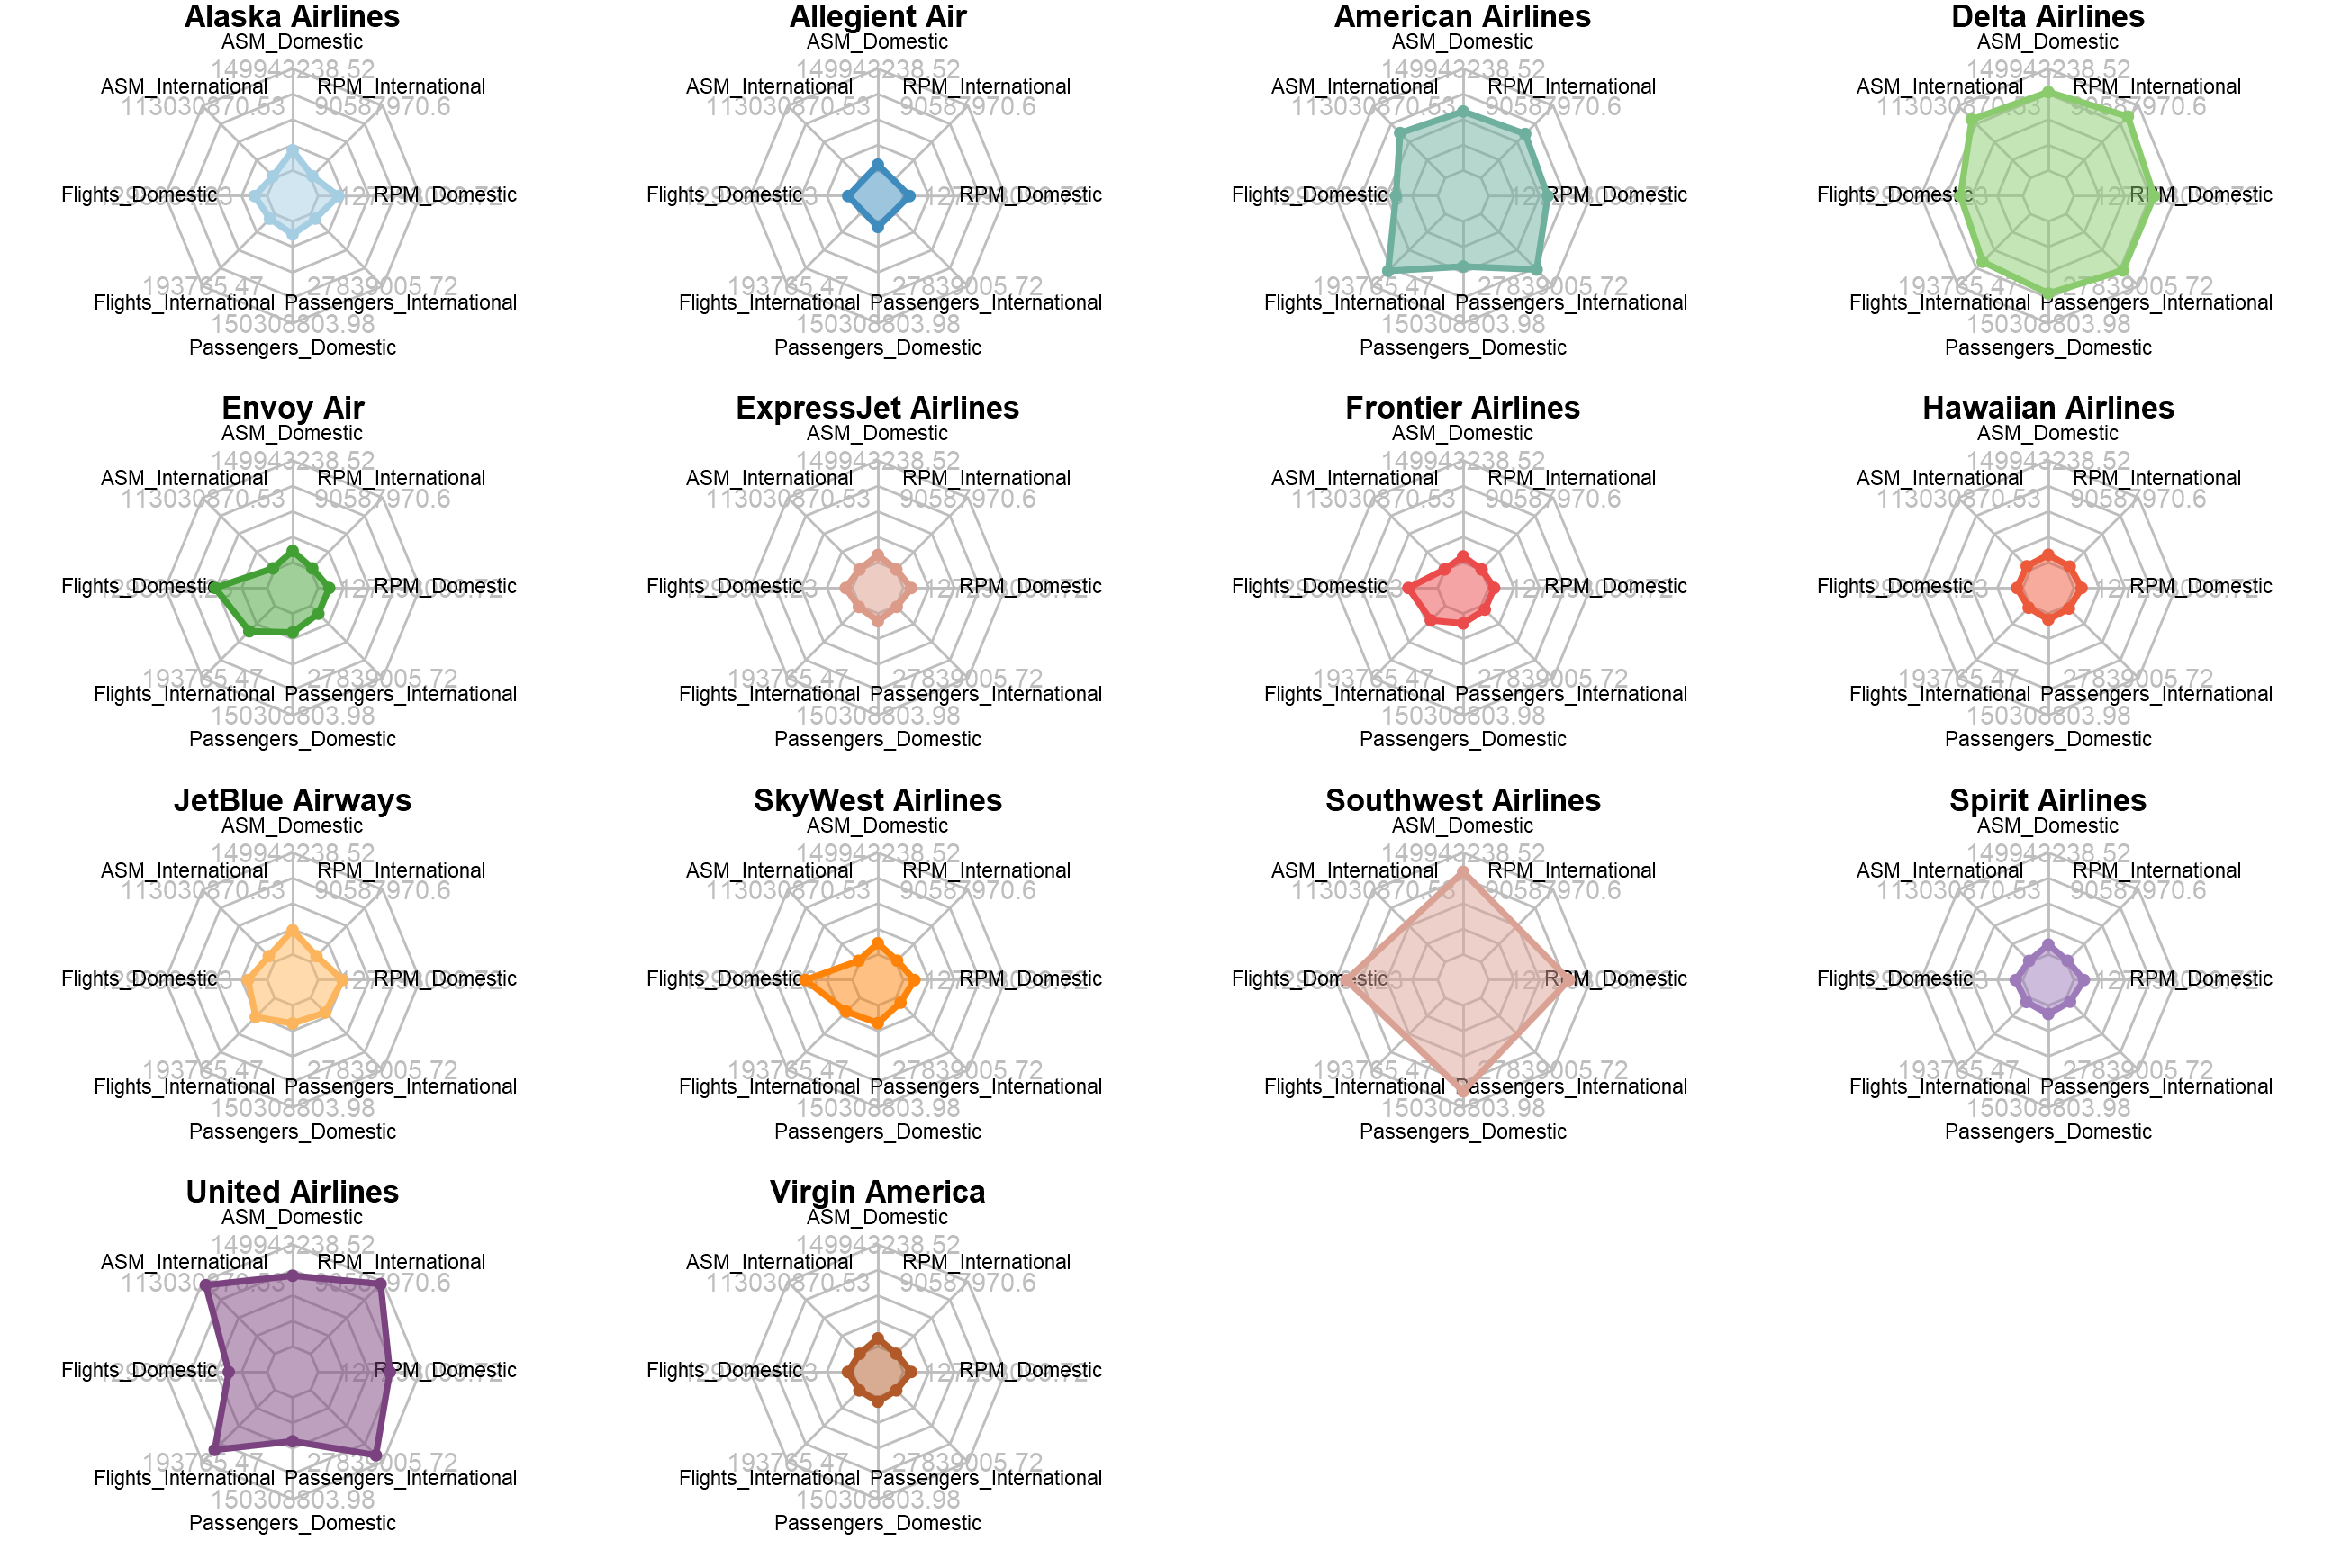

In [207]:
par(mfrow=c(4,4))
par(mar=c(1,1,1,1))
for(i in 1:nrow(data2014)){
    curCol<-(col2rgb(col_airlines[i])%>% as.integer())/255
    radarchart(rbind(max_2014,min,data2014[i,3:10]),
               axistype=2 , 
               pcol=rgb(curCol[1],curCol[2],curCol[3], alpha = 1) ,
               pfcol=rgb(curCol[1],curCol[2],curCol[3],.5) ,
               plwd=2 , cglcol="grey", cglty=1, 
               axislabcol="grey", caxislabels=seq(0,2000,5), cglwd=0.8, vlcex=0.8
               ,title=as.character(data2014$Airline.Name[i]))
}

**- Deepansh Arora**